<a href="https://colab.research.google.com/github/armandordorica/APS1070_A1/blob/master/sector_etfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=e0ff8003e06f4f4c126c136f0ae20f81664169546ea4d0fa5e7dbb7356211e67
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [62]:
from datetime import datetime, timedelta
from pandas_datareader import data as pdr

import yfinance as yf
import pandas as pd


class Stock: 
  def __init__(self, stock_name, start_dt, end_dt):
    yf.pdr_override() # <== that's all it takes :-)

    self.stock_name = stock_name 
    self.start_dt = start_dt
    self.end_dt = end_dt 
    self.data = pdr.get_data_yahoo(self.stock_name, start=self.start_dt, end=self.end_dt)

    self.ticker = yf.Ticker(self.stock_name)
    self.beta = self.ticker.info['beta']

    self.timeseries = self.data['Close']
    self.dates = self.timeseries.index.to_frame()
    # self.one_year_return = self.get_annual_return(1)
    # self.two_year_return = self.get_annual_return(2)
    # self.five_year_return = self.get_annual_return(5)

  def get_annual_return(self, num_years):
    period = 365 *num_years
    print("Period:{}".format(period))
    end = max(self.timeseries.index)
    print("end:{}".format(end))
  
    start = end - timedelta(days=period)
    try: 
      start = self.dates[self.dates['Date']<=start].iloc[-1].Date
      print("start:{}".format(start))

      ending_balance = self.timeseries.loc[end]
      beginning_balance = self.timeseries.loc[start]  

      return ((ending_balance - beginning_balance)/beginning_balance)/(period//365)

    except:
      print("\n Start date:{} is not available!".format(start))

  def get_monthly_return(self, num_months):
    period = 30 *num_months
    print("Period:{}".format(period))
    end = max(self.timeseries.index)
    print("end:{}".format(end))
  
    start = end - timedelta(days=period)
    try: 
      start = self.dates[self.dates['Date']<=start].iloc[-1].Date
      print("start:{}".format(start))

      ending_balance = self.timeseries.loc[end]
      beginning_balance = self.timeseries.loc[start]  

      return ((ending_balance - beginning_balance)/beginning_balance)/(period//30)

    except:
      print("\n Start date:{} is not available!".format(start))

  
  def get_monthly_std(self, num_months): 
    period = 30*num_months
    print("Period:{}".format(period))
    end = max(self.timeseries.index)
    print("end:{}".format(end))
  
    start = end - timedelta(days=period)
    try: 

      std_dev = self.data.loc[start:end]['Close'].std()

      print("start:{}".format(start))

      return std_dev

    except:
      print("\n Start date:{} is not available!".format(start))

  
  
  def plot(self):
    self.timeseries.plot()
    plt.title(self.stock_name)

### **Input your list of Stocks or ETFs here**

In [40]:
sector_etfs = ['IGV', 'IYJ', 'FDN', 'SMH', 'PBS', 'KBE', 'IYW', 'KIE', 'ITA', 'IHI', 'ITB', 'IYT', 'XLB', 'IYZ', 'KCE', 'XLP', 'VNQ', 'IHE', 'PBJ', 'IBB', 'IEZ', 'XLU', 'XOP', 'XRT', 'IHF']

In [41]:
three_mth_returns = []
for etf in sector_etfs: 
  etf_yahoo = Stock(etf, '2020-01-01', '2020-07-01')
  three_mth_returns.append(etf_yahoo.get_monthly_return(3))

[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:

In [71]:
three_mth_stddevs = []
for etf in sector_etfs: 
  etf_yahoo = Stock(etf, '2020-01-01', '2020-07-01')
  three_mth_stddevs.append(etf_yahoo.get_monthly_std(3))

[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:

In [72]:
d = {'sector_etfs': sector_etfs, 'three_mth_returns': three_mth_returns, 'three_mth_stddevs':three_mth_stddevs}
df = pd.DataFrame(data=d)
df

,sector_etfs,three_mth_returns,three_mth_stddevs
0,IGV,0.139683,23.194377
1,IYJ,0.092035,10.720990
2,FDN,0.145332,14.727207
3,SMH,0.124165,10.811516
4,PBS,0.145428,3.046055
5,KBE,0.084526,2.947731
6,IYW,0.128053,19.749924
7,KIE,0.054610,1.700605
8,ITA,0.069002,13.110297
9,IHI,0.080978,11.831293


Text(0.5, 1.0, 'Sector ETFS distribution of risk and variance')

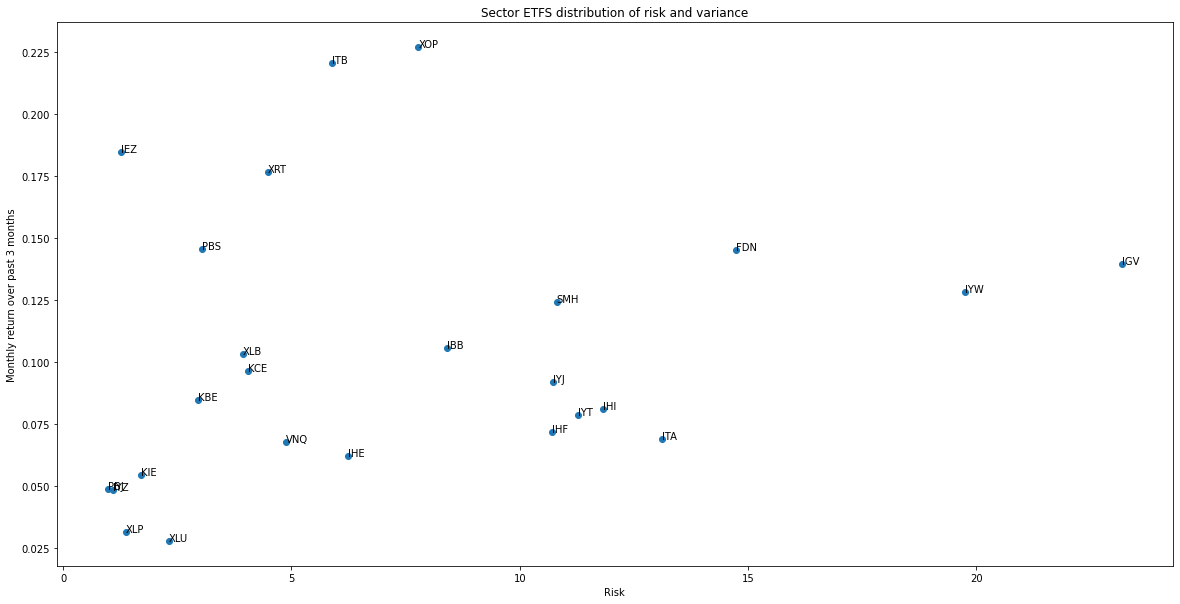

In [141]:
x = df['three_mth_stddevs']
y = df['three_mth_returns']
n = df['sector_etfs']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Monthly return over past 3 months')
ax.set_xlabel('Risk')
ax.set_title("Sector ETFS distribution of risk and variance")


### IGV - iShares S&P Software Industry Index

In [63]:
IGV = Stock ('IGV', '2012-01-01', '2020-07-01')

[*********************100%***********************]  1 of 1 completed


In [64]:
IGV.get_monthly_std(3)

Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00


23.194376756102262

In [33]:
three_mth_return = IGV.get_monthly_return(3)
three_mth_return

Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00


0.1396834963547813

In [34]:
three_mth_return

0.1396834963547813

In [6]:
IGV.one_year_return

0.28144437207835676

In [7]:
IGV.two_year_return

0.2779998122303526

In [9]:
IGV.five_year_return

0.3707831412745578

### Stocks Risk Return Analysis

In [93]:
k = []
for i in stocks:
    j = i.replace('\t','')
    k.append(j)

In [117]:
stocks =['AAPL',
 'AC',
 'AMD',
 'AMZN',
 'COST',
 'DAL',
 'DIA',
 'FB',
 'GOOGL',
 'HD',
 'INTC',
 'INTU',
 'IVR',
 'L',
 'LMT',
 'MA',
 'MELI',
 'MRNA',
 'MSFT',
 'NFLX',
 'NVDA',
 'PYPL',
 'QQQ',
 'QTEC',
 'RY',
 'SHOP',
 'SNE',
 'SPCE',
 'SPY',
 'SQ',
 'V',
 'ZM']

In [118]:
three_mth_returns = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2020-01-01', '2020-07-01')
  three_mth_returns.append(stock_yahoo.get_monthly_return(3))

AAPL
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AC
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AMD
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AMZN
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
COST
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
DAL
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
DIA
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
FB
[*********************100%***********************]  1 of 1 compl

In [135]:
three_mth_stddevs = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2020-01-01', '2020-07-01')
  three_mth_stddevs.append(stock_yahoo.get_monthly_std(3))

AAPL
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AC
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AMD
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AMZN
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
COST
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
DAL
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
DIA
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
FB
[*********************100%***********************]  1 of 1 compl

In [136]:
d = {'stocks': stocks, 'Monthly returns over past 3 months': three_mth_returns, 'three_mth_stddevs':three_mth_stddevs}
stocks_df = pd.DataFrame(data=d)
stocks_df

,stocks,Monthly returns over past 3 months,three_mth_stddevs
0,AAPL,0.171419,33.301355
1,AC,0.133817,3.087816
2,AMD,0.068331,3.079535
3,AMZN,0.148717,206.570801
4,COST,0.019097,5.950383
5,DAL,0.058372,3.959533
6,DIA,0.077196,14.296369
7,FB,0.140915,25.470798
8,GOOGL,0.095560,97.942449
9,HD,0.134132,22.106149


In [133]:
(AMZN.timeseries.loc['2020-06-30']-AMZN.timeseries.loc['2020-04-01'])/AMZN.timeseries.loc['2020-04-01']

0.4461498867600579

In [132]:
AMZN.timeseries.loc['2020-04-01']

1907.699951171875

Text(0.5, 1.0, 'Distribution of stocks by risk and variance')

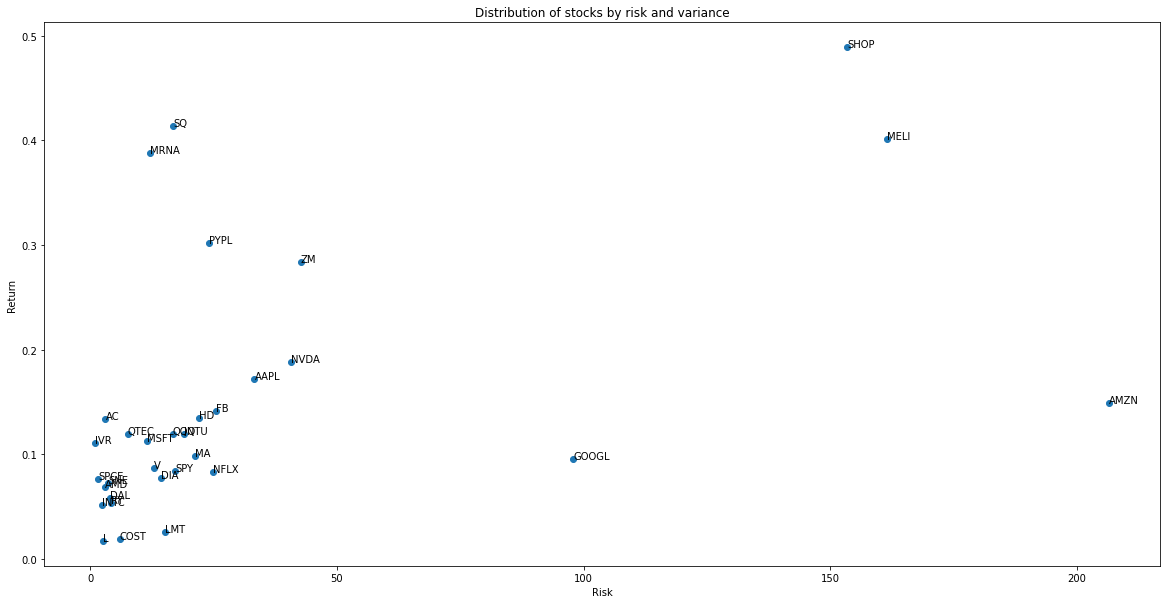

In [139]:
x = stocks_df['three_mth_stddevs']
y = stocks_df['Monthly returns over past 3 months']
n = stocks_df['stocks']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Return')
ax.set_xlabel('Risk')
ax.set_title("Distribution of stocks by risk and variance")


### Market Vectors Semiconductor ETF

In [126]:
AMZN = Stock ('AMZN', '2012-01-01', '2020-07-01')

[*********************100%***********************]  1 of 1 completed


In [127]:
AMZN.get_monthly_return(3)

Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00


0.1487166289200193

In [11]:
SMH = Stock ('SMH', '2012-01-01', '2020-07-01')

[*********************100%***********************]  1 of 1 completed
Period:365
end:2020-06-30 00:00:00
start:2019-07-01 00:00:00
Period:730
end:2020-06-30 00:00:00
start:2018-06-29 00:00:00
Period:1825
end:2020-06-30 00:00:00
start:2015-07-02 00:00:00


In [13]:
SMH.one_year_return, SMH.five_year_return

(0.34875100906469575, 0.354426727186923)

### iShares DJ U.S. Technology sector

In [14]:
IYW = Stock ('IYW', '2012-01-01', '2020-07-01')
IYW.one_year_return, IYW.five_year_return

[*********************100%***********************]  1 of 1 completed
Period:365
end:2020-06-30 00:00:00
start:2019-07-01 00:00:00
Period:730
end:2020-06-30 00:00:00
start:2018-06-29 00:00:00
Period:1825
end:2020-06-30 00:00:00
start:2015-07-02 00:00:00


(0.3425556268870849, 0.3126353454634857)